In [15]:
### FACE RECOGNITION ###
import cv2 as cv
import numpy as np
import mtcnn
import os
import glob
import tqdm
import matplotlib.pyplot as plt

In [12]:
### FACE DATASET FEATURE EXTRACTION ###
features = []
labels = []
people = [
    'Ben Afflek',
    'Elton John',
    'Jerry Seinfield',
    'Madonna',
    'Mindy Kaling',
]
mtcnn_model = mtcnn.MTCNN()
for p in people:
    dir_ = os.path.join('Resources/Faces/train', p)
    images = glob.glob(os.path.join(dir_, '*.jpg'))
    for img_path in tqdm.tqdm(
        images, 
        desc='[INFO] Loading Images From :: {0}'.format(p)
    ):
        img = cv.imread(img_path)
        img_rgb = cv.cvtColor(img, cv.COLOR_BGR2RGB)
        faces = mtcnn_model.detect_faces(img_rgb)
        try:
            x, y, w, h = faces[0]['box']
            face = img[y:y+h, x:x+w]
            features.append(cv.cvtColor(face, cv.COLOR_RGB2GRAY))
            labels.append(people.index(p))
        except:
            pass
features = np.array(features, dtype='object')
labels = np.array(labels)
print('[INFO] Features Shape :: {0}'.format(features.shape))
print('[INFO] Labels :: {0}'.format(np.unique(labels)))

[INFO] Loading Images From :: Mindy Kaling: 100%|██████████| 22/22 [00:13<00:00,  1.66it/s]

[INFO] Features Shape :: (93,)
[INFO] Labels :: [0 1 2 3 4]


In [13]:
### TRAINING FACE FEATURES TO LBPRecognizer ###
save_dir = 'Model/face_recognition'
os.makedirs(save_dir, exist_ok=True)
print('[INFO] Training Model')
face_recognizer = cv.face.LBPHFaceRecognizer_create()
face_recognizer.train(features, labels)
print('[INFO] Saving Trained Model')
face_recognizer.save(os.path.join(save_dir, 'model.yml'))
np.save(os.path.join(save_dir, 'features.npy'), features)
np.save(os.path.join(save_dir, 'labels.npy'), labels)

[INFO] Training Model
[INFO] Saving Trained Model


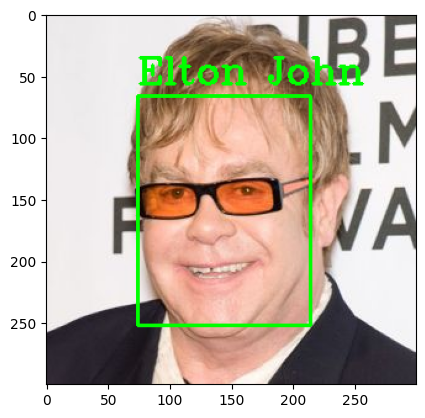

In [21]:
### FACE RECOGNIZE ###
img_path = 'Resources/Faces/val/elton_john/1.jpg'
img = cv.imread(img_path)
img_rgb = cv.cvtColor(img, cv.COLOR_BGR2RGB)
(x, y, w, h) = mtcnn_model.detect_faces(img_rgb)[0]['box']
face = cv.cvtColor(img[y:y+h, x:x+w], cv.COLOR_RGB2GRAY)
label, confidence = face_recognizer.predict(face)
cv.rectangle(img_rgb, (x, y), (x+w, y+h), (0, 255, 0), 2)
cv.putText(img_rgb, people[label], (x, y-10), cv.FONT_HERSHEY_COMPLEX,
           1.0, (0, 255, 0), 2)
plt.imshow(img_rgb)